# 맛보기 회귀분석

In [9]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

df=pd.DataFrame(data, columns=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE",
                               "DIS","RAD","TAX","PTRATIO","B","LSTAT"])
df["PRICE"]=target
df.head()

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\user\AppData\Local\Temp\ipykernel_17872\833545838.py:5: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
df.shape,df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


((506, 14), None)

In [12]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

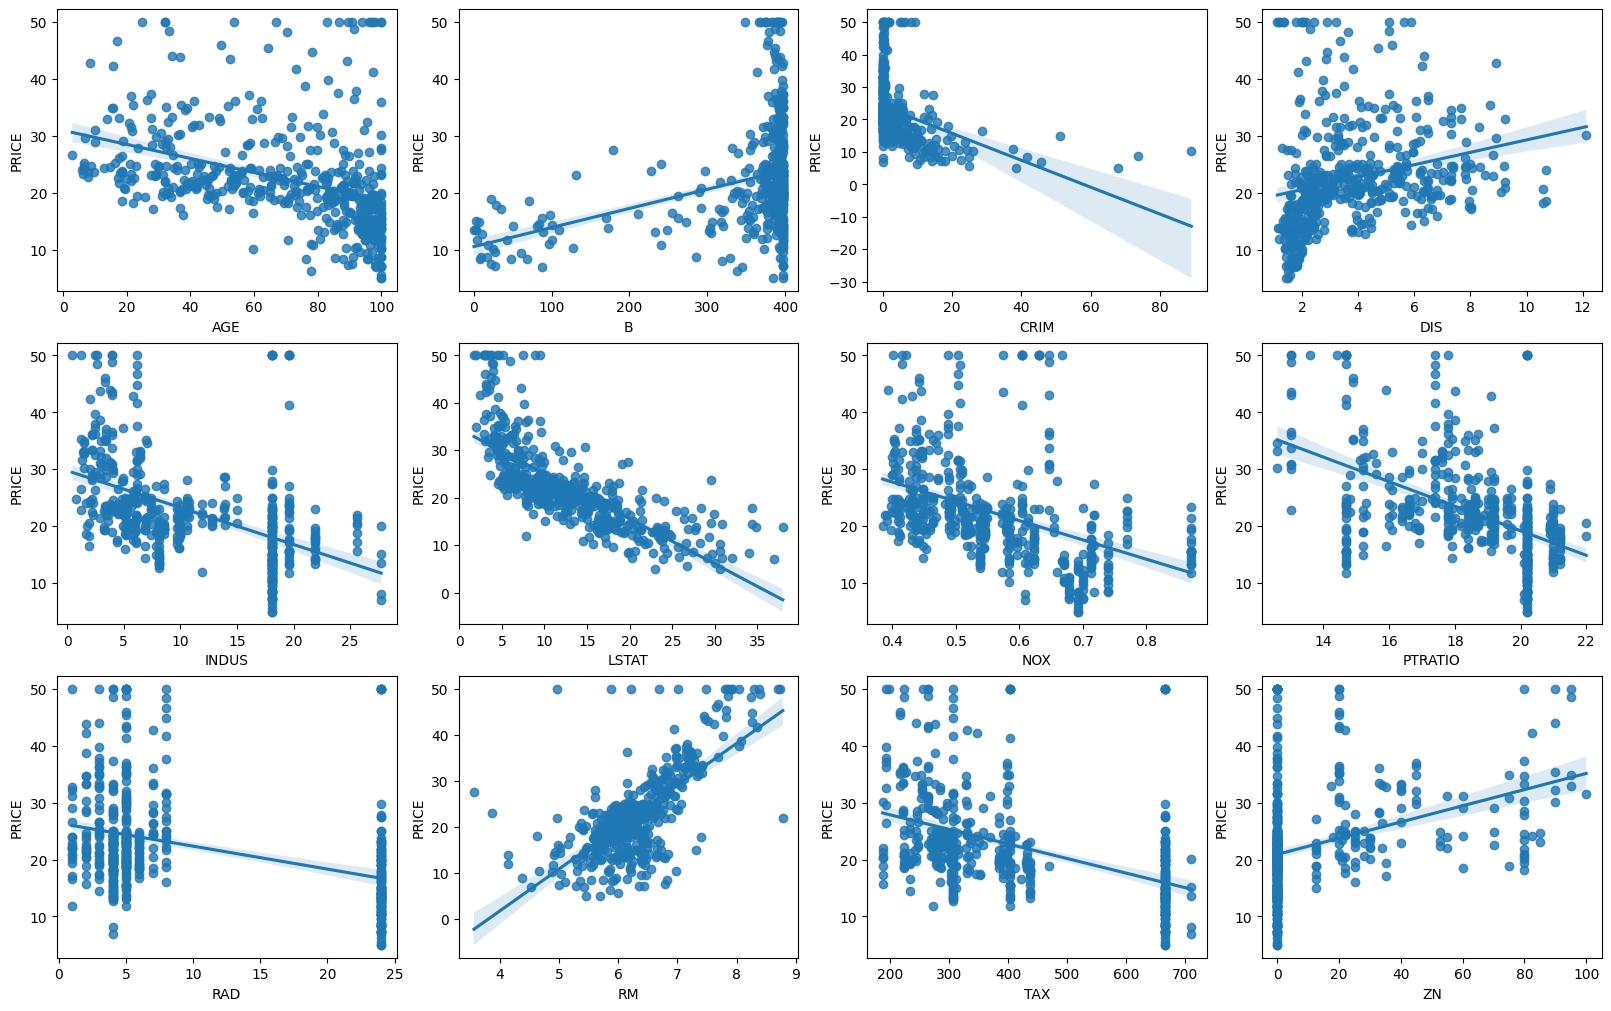

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(16,10), ncols=4, nrows=3,
                       constrained_layout=True)
features = df.columns.difference(["PRICE","CHAS"])

for i, feature in zip(range(12), features):
    row=int(i/4)
    col=i%4
    sns.regplot(x=feature, y=df["PRICE"], data=df, ax=ax[row][col])

In [17]:
from sklearn.model_selection import train_test_split
X = df.loc[:,"CRIM":"LSTAT"]
y = df.PRICE

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [19]:
y_train.mean(),y_test.mean()

(22.796534653465343, 21.488235294117644)

In [22]:
from sklearn.preprocessing import MaxAbsScaler
scaler=MaxAbsScaler()

X_train_Scaled=scaler.fit_transform(X=X_train)
X_test_Scaled=scaler.transform(X=X_test)

In [23]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train_Scaled, y_train)

LinearRegression()

In [50]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor(n_neighbors=3, weights="distance")
KNN.fit(X_train_Scaled, y_train)

KNeighborsRegressor(n_neighbors=3, weights='distance')

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

pred_linear_train=linear.predict(X_train_Scaled)
pred_knn_train=KNN.predict(X_train_Scaled)

def scores(true, pred):
    mae=mean_absolute_error(true, pred)
    mse=mean_squared_error(true,pred)
    rmse=np.sqrt(mse)
    r2=r2_score(true,pred)
    print(f"MAE: {mae: .5f}")
    print(f"MSE: {mse: .5f}")
    print(f"RMSE: {rmse: .5f}")
    print(f"R2: {r2: .5f}")

print("Linear Regression:")
scores(y_train, pred_linear_train)
print()
print("KNN Regressor:")
scores(y_train, pred_knn_train)

Linear Regression:
MAE:  3.31477
MSE:  21.64141
RMSE:  4.65203
R2:  0.75089

KNN Regressor:
MAE:  0.00000
MSE:  0.00000
RMSE:  0.00000
R2:  1.00000


In [52]:
pred_linear_test=linear.predict(X_test_Scaled)
pred_knn_test=KNN.predict(X_test_Scaled)

print("Linear Regression:")
scores(y_test, pred_linear_test)
print()
print("KNN Regressor:")
scores(y_test, pred_knn_test)

Linear Regression:
MAE:  3.18909
MSE:  24.29112
RMSE:  4.92860
R2:  0.66876

KNN Regressor:
MAE:  2.67345
MSE:  18.96418
RMSE:  4.35479
R2:  0.74140
